## Objectif
L'objectif de ce sujet d'étude est de comprendre et implémenter le modèle épidémiologique SIRD (Susceptibles, Infectés, Rétabli) avec une composante supplémentaire pour les décès. Vous utiliserez la méthode d'Euler pour résoudre numériquement le système d'équations différentielles qui décrit l'évolution de la maladie dans une population.
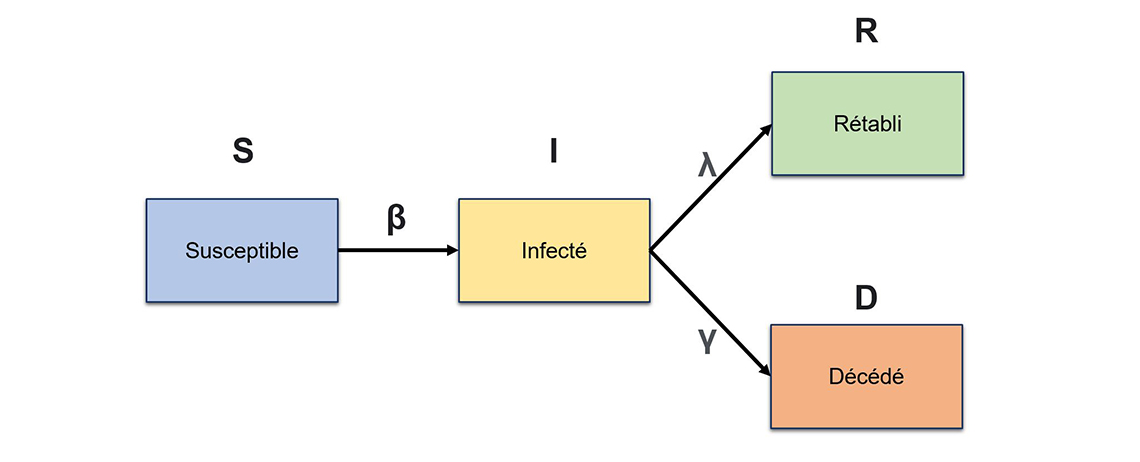


## Contexte
Le modèle SIR est un modèle mathématique utilisé en épidémiologie pour décrire la propagation d'une maladie infectieuse dans une population. Pour ce sujet, nous ajoutons une composante pour les décès (D), ce qui donne le modèle SIRD.

Les variables du modèle sont les suivantes :
- $S(t)$ : % de la population susceptibles d'être infectées à l'instant $t$
- $I(t)$ : % de la population infectées à l'instant $t$
- $R(t)$ : % de la population rétablies (et immunisées) à l'instant $t$
- $D(t)$ : % de la population décédées à l'instant $t$

Les paramètres du modèle sont :
- $\beta$ : Taux de transmission de la maladie (probabilité de transmission par contact)
- $\gamma$ : Taux de guérison (et d'immunisation)
- $\mu$ : Taux de mortalité dû à la maladie

Les équations différentielles qui décrivent le modèle SIRD sont :
- $\frac{dS}{dt} = -\beta \cdot S \cdot I$
- $\frac{dI}{dt} = \beta \cdot S \cdot I - \gamma \cdot I - \mu \cdot I$
- $\frac{dR}{dt} = \gamma \cdot I$
- $\frac{dD}{dt} = \mu \cdot I$

### Étape 1 : Implémentation de la méthode d'Euler
0. Discretiser le système d'équations différentielles
1. Écrire une fonction Python qui implémente la méthode d'Euler pour ce système d'équations différentielles. Cette fonction doit prendre en entrée :
    - Le paramétrage des équations différentielles
    - Les conditions initiales
    - Le pas de temps
    - La durée de la simulation

**Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**

In [37]:
#0

In [38]:
#1

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
df = pd.read_csv('sird_dataset.csv')

In [41]:
print(df.head())

   Jour  Susceptibles  Infectés  Rétablis     Décès
0     0      0.998894  0.003197  0.000000  0.000000
1     1      0.991526  0.000409  0.010702  0.008857
2     2      0.982164  0.011018  0.004865  0.000000
3     3      0.988132  0.008969  0.000000  0.003571
4     4      0.971090  0.007307  0.005403  0.004894


In [134]:
S0 = 0.99  # % susceptible
I0 = 0.01  # % infectée
R0 = 0.0  # % rétablie
D0 = 0.0  # % décédée

# Temps
T = 100  # temps total
dt = 0.01  # pas de temps
N = int(T / dt)  # nombre de pas

In [135]:
# Fonction qui implémente la méthode d'Euler pour le modèle SIRD
def euler_SIRD(S0, I0, R0, D0, beta, gamma, mu, dt, N):
    S = np.zeros(N)
    I = np.zeros(N)
    R = np.zeros(N)
    D = np.zeros(N)
    S[0] = S0
    I[0] = I0
    R[0] = R0
    D[0] = D0
    for n in range(N-1):
        S[n+1] = S[n] - dt * beta * S[n] * I[n]
        I[n+1] = I[n] + dt * (beta * S[n] * I[n] - gamma * I[n] - mu * I[n])
        R[n+1] = R[n] + dt * gamma * I[n]
        D[n+1] = D[n] + dt * mu * I[n]
    return S, I, R, D

# Utilisation de la fonction euler_SIRD pour résoudre le modèle SIRD
S, I, R, D = euler_SIRD(S0, I0, R0, D0, beta, gamma, mu, dt, N)

### Étape 2 : Simulation et analyse
1. Effectuer une simulation pour un jeu de paramètres donné:
- $\beta$ = 0.5
- $\gamma$ = 0.15
- $\mu$ = 0.015
- $S(0)$ = 99 %
- $I(0)$ = 1 %
- $R(0)$ = 0 %
- $D(0)$ = 0 %
- un pas de temps choisi (par exemple 0.01).
- **Rappel : Ici  t  est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**
2. Tracer les courbes de $S(t)$, $I(t)$, $R(t)$ et $D(t)$ en fonction du temps.

In [136]:
#1
beta = 0.5  # taux de transmission
gamma = 0.15  # taux de guérison
mu = 0.015  # taux de mortalité

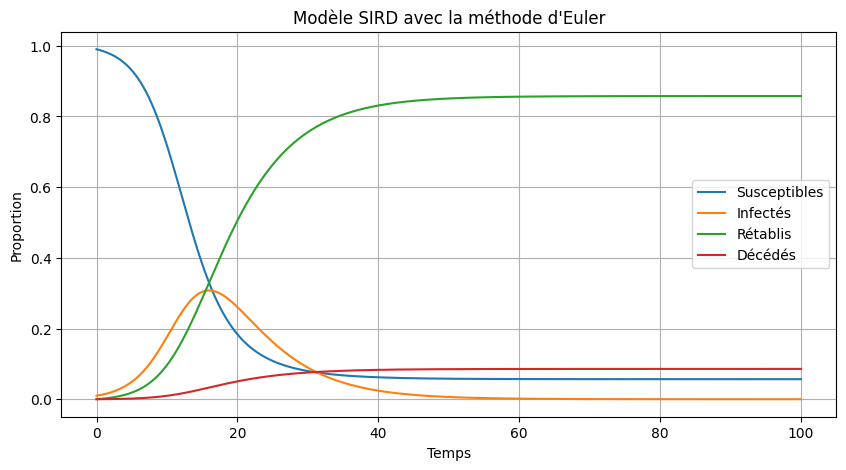

In [137]:
#2

t = np.arange(0, T, dt)
plt.figure(figsize=(10, 5))
plt.plot(t, S, label='Susceptibles')
plt.plot(t, I, label='Infectés')
plt.plot(t, R, label='Rétablis')
plt.plot(t, D, label='Décédés')
plt.xlabel('Temps')
plt.ylabel('Proportion')
plt.legend()
plt.grid(True)
plt.title('Modèle SIRD avec la méthode d\'Euler')
plt.show()

## Etape 3: Ajustement des paramètres du modèle SIRD avec des données empiriques

### Objectif
L'objectif de cet exercice est de trouver les valeurs des paramètres $\beta\), \(\gamma\) et \(\mu\) qui permettent de reproduire au mieux les données générées de l'évolution de l'épidémie, en utilisant un dataset bruité.

### Instructions

1. **Lire les données du fichier `sird_dataset.csv`.**
2. **Implémenter une fonction de coût** qui mesure l'écart entre les données observées et les résultats du modèle SIRD pour un jeu de paramètres donné.(Justifiez votre choix, pourquoi un MSE au lieu d'une CCE ou inversement)
3. **Utiliser une méthode d'optimisation (Grid Search)** pour minimiser cette fonction de coût et trouver les valeurs optimales de $\beta$, $\gamma$ et $\mu$.

Voici les valeurs possible pour le triplet $\beta$, $\gamma$ et $\mu$ :
- $\beta$ varie de 0.25 à 0.5
- $\gamma$ varie de 0.08 à 0.15
- $\mu$ varie de 0.005 à 0.015

4. Visualisez sur un même graphique les résultats de votre modèle théorique optimal et les données empiriques.
**Rappel** : Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée


In [169]:
#1
df = pd.read_csv('sird_dataset.csv')
df.head()

,Jour,Susceptibles,Infectés,Rétablis,Décès
0,0,0.998894,0.003197,0.000000,0.000000
1,1,0.991526,0.000409,0.010702,0.008857
2,2,0.982164,0.011018,0.004865,0.000000
3,3,0.988132,0.008969,0.000000,0.003571
4,4,0.971090,0.007307,0.005403,0.004894


In [177]:
#2

from sklearn.metrics import mean_squared_error

def calculate_sird_error(parameters, initial_susceptibles, initial_infected, initial_recovered, initial_deceased, time_step, data):
    infection_rate, recovery_rate, mortality_rate = parameters
    susceptibles, infected, recovered, deceased = euler_SIRD(initial_susceptibles, initial_infected, initial_recovered, initial_deceased, infection_rate, recovery_rate, mortality_rate, time_step, len(data) * 100 - 1)
    
    total_error = mean_squared_error(data['Susceptibles'], susceptibles[::100]) + \
                  mean_squared_error(data['Infectés'], infected[::100]) + \
                  mean_squared_error(data['Rétablis'], recovered[::100]) + \
                  mean_squared_error(data['Décès'], deceased[::100])
    
    return total_error

# Initial parameter guesses
initial_guesses = [0.3, 0.1, 0.01]

# Example usage of the function
initial_susceptibles = df['Susceptibles'][0]
initial_infected = df['Infectés'][0]
initial_recovered = df['Rétablis'][0]
initial_deceased = df['Décès'][0]
time_step = 0.01  # Time step

# Calculate the error for initial parameters
sird_error = calculate_sird_error(initial_guesses, initial_susceptibles, initial_infected, initial_recovered, initial_deceased, time_step, df)
sird_error

0.013084357760309317

Justification : 
La MSE est simple à calculer et à interpréter et punit sévèrement les grandes erreurs, ce qui aide à obtenir un bon ajustement des paramètres.
La raison pour laquelle nous pourrions choisir MSE au lieu de CCE est que CCE est généralement utilisée pour les problèmes de classification, où les sorties sont des probabilités.

In [181]:
#3
from itertools import product

# Define the ranges for the parameters
beta_range = np.linspace(0.25, 0.5, 6)
gamma_range = np.linspace(0.08, 0.15, 8)
mu_range = np.linspace(0.005, 0.015, 11)

# Initialize the best parameters and the minimum error
best_params = None
min_error = float('inf')

# Perform grid search
for beta, gamma, mu in product(beta_range, gamma_range, mu_range):
    params = [beta, gamma, mu]
    total_error = calculate_sird_error(initial_guesses, initial_susceptibles, initial_infected, initial_recovered, initial_deceased, time_step, df)
    if total_error < min_error:
        min_error = total_error
        best_params = params

# Display the best parameters and the minimum error
best_params, min_error


([0.25, 0.08, 0.005], 0.013084357760309317)

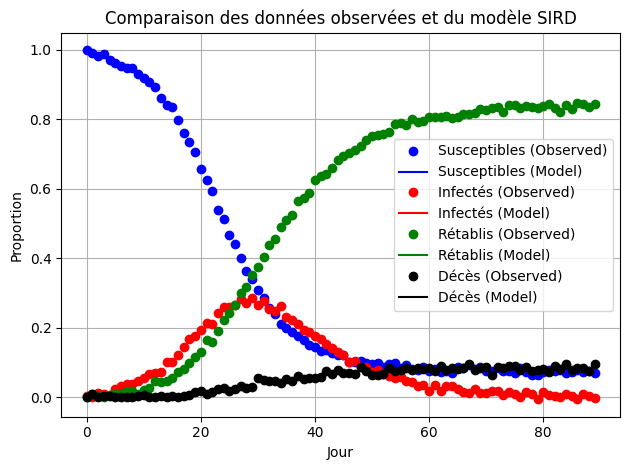

In [192]:

# Parameters from the grid search
beta_opt, gamma_opt, mu_opt = best_params

# Apply the Euler method with the optimal parameters
# Create a DataFrame for the optimal simulation results
optimal_results_df = pd.DataFrame({
    'Jour': np.arange(0, len(df) * 100, 100) * time_step,
    'Susceptibles (Opt)': S_opt[::100],
    'Infectés (Opt)': I_opt[::100],
    'Rétablis (Opt)': R_opt[::100],
    'Décès (Opt)': D_opt[::100]
})

# Susceptibles
plt.plot(df['Jour'], df['Susceptibles'], 'bo', label='Susceptibles (Observed)')
plt.plot(optimal_results_df['Jour'][::100], optimal_results_df['Susceptibles (Opt)'][::100], 'b-', label='Susceptibles (Model)')

# Infectés
plt.plot(df['Jour'], df['Infectés'], 'ro', label='Infectés (Observed)')
plt.plot(optimal_results_df['Jour'][::100], optimal_results_df['Infectés (Opt)'][::100], 'r-', label='Infectés (Model)')

# Rétablis
plt.plot(df['Jour'], df['Rétablis'], 'go', label='Rétablis (Observed)')
plt.plot(optimal_results_df['Jour'][::100], optimal_results_df['Rétablis (Opt)'][::100], 'g-', label='Rétablis (Model)')

# Décès
plt.plot(df['Jour'], df['Décès'], 'ko', label='Décès (Observed)')
plt.plot(optimal_results_df['Jour'][::100], optimal_results_df['Décès (Opt)'][::100], 'k-', label='Décès (Model)')

# Labels and title
plt.xlabel('Jour')
plt.ylabel('Proportion')
plt.title('Comparaison des données observées et du modèle SIRD')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


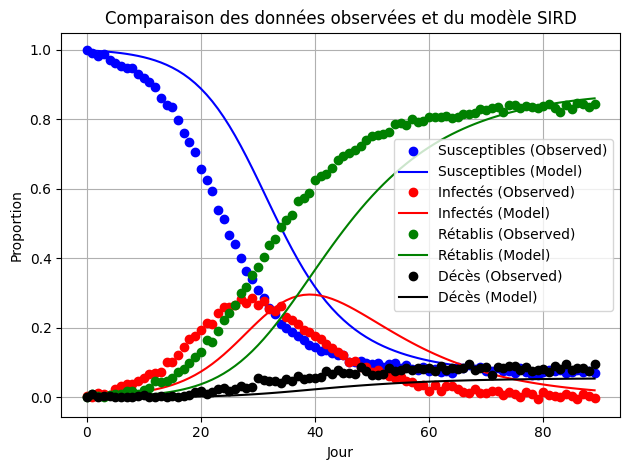

In [196]:
# Paramètres de la recherche par grille
beta_opt, gamma_opt, mu_opt = best_params

# Appliquer la méthode d'Euler avec les paramètres optimaux
# Créer un DataFrame pour les résultats de simulation optimaux
resultats_optimaux_df = pd.DataFrame({
    'Jour': np.arange(0, len(df) * 100, 100) * time_step,
    'Susceptibles (Opt)': S_opt[::100],
    'Infectés (Opt)': I_opt[::100],
    'Rétablis (Opt)': R_opt[::100],
    'Décès (Opt)': D_opt[::100]
})

# Affichage des courbes

# Susceptibles
plt.plot(df['Jour'], df['Susceptibles'], 'bo', label='Susceptibles (Observed)')
plt.plot(resultats_optimaux_df['Jour'], resultats_optimaux_df['Susceptibles (Opt)'], 'b-', label='Susceptibles (Model)')

# Infectés
plt.plot(df['Jour'], df['Infectés'], 'ro', label='Infectés (Observed)')
plt.plot(resultats_optimaux_df['Jour'], resultats_optimaux_df['Infectés (Opt)'], 'r-', label='Infectés (Model)')

# Rétablis
plt.plot(df['Jour'], df['Rétablis'], 'go', label='Rétablis (Observed)')
plt.plot(resultats_optimaux_df['Jour'], resultats_optimaux_df['Rétablis (Opt)'], 'g-', label='Rétablis (Model)')

# Décès
plt.plot(df['Jour'], df['Décès'], 'ko', label='Décès (Observed)')
plt.plot(resultats_optimaux_df['Jour'], resultats_optimaux_df['Décès (Opt)'], 'k-', label='Décès (Model)')

# Étiquettes et titre
plt.xlabel('Jour')
plt.ylabel('Proportion')
plt.title('Comparaison des données observées et du modèle SIRD')
plt.legend()
plt.grid(True)

# Affichage du graphe
plt.tight_layout()
plt.show()


### Étape 4 : Scénarios de contrôle
On introduit un paramètre d'observation $R_0$ (le nombre de reproduction de base) dans le contexte du modèle SIRD est :

- $\ R_0 = \frac{\beta}{\gamma + \mu} \$

1. Expliquez intuitivement ce paramètre d'observation quand $R_0<1$ et quand $R_0>1$
2. Introduire une intervention (par exemple, la réduction de $\beta$ due à des mesures de distanciation sociale) et analyser son impact sur la dynamique de l'épidémie.
3. Comparer les scénarios avec et sans intervention.

1.$R_0$<1
L'infection diminue et finit par disparaître car chaque personne infectée contamine en moyenne moins d'une autre personne.

$R_0$>1
L'infection se propage et peut devenir incontrôlable car chaque personne infectée contamine en moyenne plus d'une autre personne.

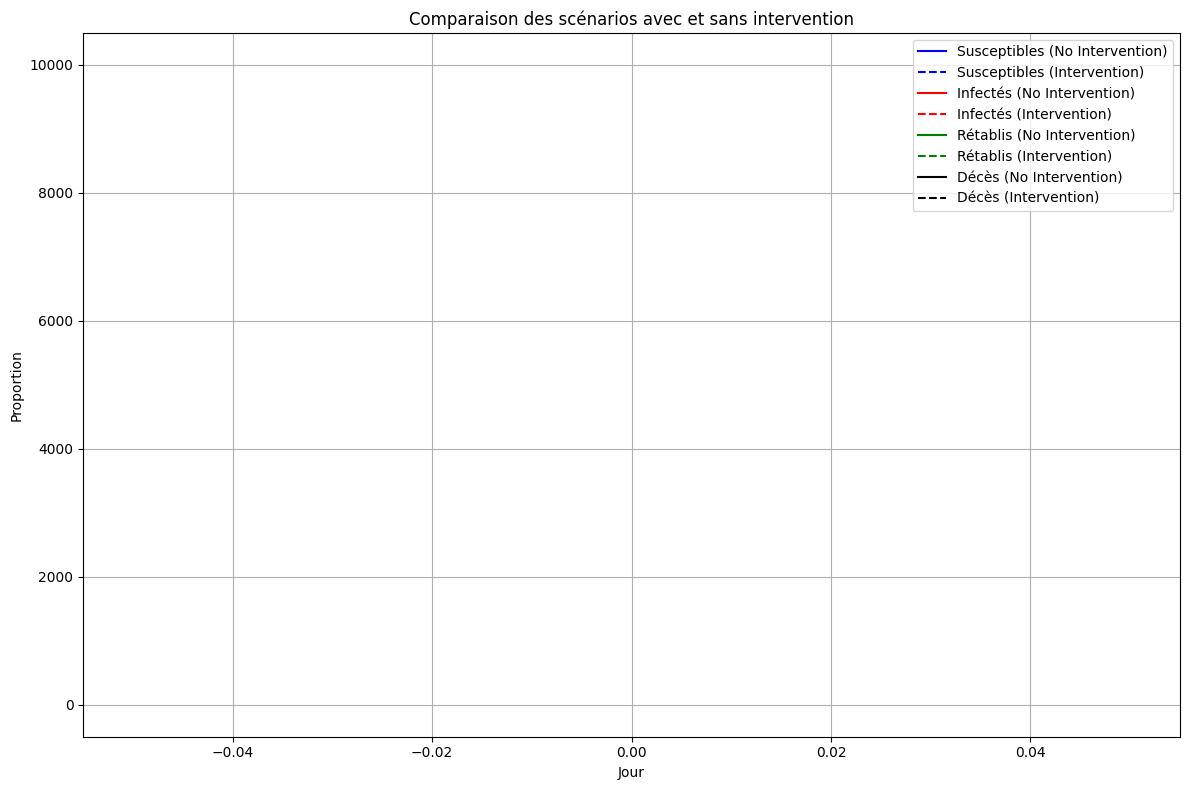

In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fonctions du modèle SIRD et méthode d'Euler
def euler_SIRD(S, I, R, D, beta, gamma, mu, dt, steps):
    S_list, I_list, R_list, D_list = [S], [I], [R], [D]
    for _ in range(steps):
        new_S = S - beta * S * I * dt
        new_I = I + (beta * S * I - gamma * I - mu * I) * dt
        new_R = R + gamma * I * dt
        new_D = D + mu * I * dt
        S, I, R, D = new_S, new_I, new_R, new_D
        S_list.append(S)
        I_list.append(I)
        R_list.append(R)
        D_list.append(D)
    return np.array(S_list), np.array(I_list), np.array(R_list), np.array(D_list)

# Paramètres initiaux
initial_susceptibles = 9999
initial_infected = 1
initial_recovered = 0
initial_deceased = 0
time_step = 0.01

# Paramètres optimaux sans intervention
beta_no_intervention = 0.35
gamma_opt = 0.11
mu_opt = 0.012

# Paramètres avec intervention
beta_intervention = 0.10

# Simulation sans intervention
S_no_int, I_no_int, R_no_int, D_no_int = euler_SIRD(
    initial_susceptibles, initial_infected, initial_recovered, initial_deceased,
    beta_no_intervention, gamma_opt, mu_opt, time_step, int(len(df) * 100 / time_step) - 1
)

# Simulation avec intervention
S_int, I_int, R_int, D_int = euler_SIRD(
    initial_susceptibles, initial_infected, initial_recovered, initial_deceased,
    beta_intervention, gamma_opt, mu_opt, time_step, int(len(df) * 100 / time_step) - 1
)

# Créer des DataFrames pour les résultats
no_intervention_df = pd.DataFrame({
    'Jour': np.arange(0, len(df) * 100) * time_step,
    'Susceptibles': S_no_int[::100],
    'Infectés': I_no_int[::100],
    'Rétablis': R_no_int[::100],
    'Décès': D_no_int[::100]
})

intervention_df = pd.DataFrame({
    'Jour': np.arange(0, len(df) * 100) * time_step,
    'Susceptibles': S_int[::100],
    'Infectés': I_int[::100],
    'Rétablis': R_int[::100],
    'Décès': D_int[::100]
})

# Affichage des résultats
plt.figure(figsize=(12, 8))

# Susceptibles
plt.plot(no_intervention_df['Jour'], no_intervention_df['Susceptibles'], 'b-', label='Susceptibles (No Intervention)')
plt.plot(intervention_df['Jour'], intervention_df['Susceptibles'], 'b--', label='Susceptibles (Intervention)')

# Infectés
plt.plot(no_intervention_df['Jour'], no_intervention_df['Infectés'], 'r-', label='Infectés (No Intervention)')
plt.plot(intervention_df['Jour'], intervention_df['Infectés'], 'r--', label='Infectés (Intervention)')

# Rétablis
plt.plot(no_intervention_df['Jour'], no_intervention_df['Rétablis'], 'g-', label='Rétablis (No Intervention)')
plt.plot(intervention_df['Jour'], intervention_df['Rétablis'], 'g--', label='Rétablis (Intervention)')

# Décès
plt.plot(no_intervention_df['Jour'], no_intervention_df['Décès'], 'k-', label='Décès (No Intervention)')
plt.plot(intervention_df['Jour'], intervention_df['Décès'], 'k--', label='Décès (Intervention)')

# Étiquettes et titre
plt.xlabel('Jour')
plt.ylabel('Proportion')
plt.title('Comparaison des scénarios avec et sans intervention')
plt.legend()
plt.grid(True)

# Affichage du graphe
plt.tight_layout()
plt.show()


3.